<a href="https://colab.research.google.com/github/disakuz/Python_netbooks/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ДЗ Paython/Данные для ДЗ/database.csv')
df.head()

,Record ID,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
0,1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
1,2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
3,4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
4,5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


In [ ]:
#построим график отзывных компаний по годам
df_recall = df[['Record ID','Model Year']].groupby('Model Year').count().rename(columns = {'Record ID':'Recall_count'})
df_recall.head(100)

,Recall_count
Model Year,
1949,1
1950,1
1951,1
1952,1
1953,1
...,...
2015,3077
2016,2263
2017,799


In [ ]:
df_recall1 = df_recall.drop([9999])

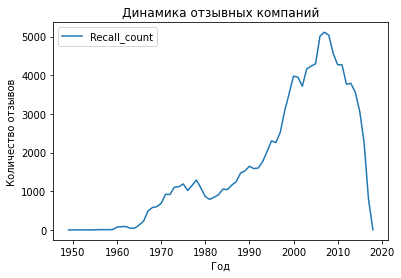

In [ ]:
df_recall1.plot(title ='Динамика отзывных компаний', xlabel = 'Год',ylabel = 'Количество отзывов')

можно предположить, что спад отзывных компаний связан с кризисом 2008 года, т.к. спрос снизился и после автопроизводители стали переходить на платформенное производство линейек авто смежных сигментов

In [ ]:
df_make = df[['Vehicle Make','Record ID']].groupby('Vehicle Make').count()
df_make.head(100)

,Record ID
Vehicle Make,
109S MEDALIST TRAIL A/P,1
109S PHANTOM AP,1
112S UNIROYAL LAREDO A/S,1
114S UNIROYAL LAREDO AWP,1
3M,1
...,...
ALPHA ELITE,4
ALPHASPORTS,2
ALPINE,1


In [ ]:
# Рассмотрим кому принадлежит больше всего отзывных компаний
df_make = df_make.sort_values('Record ID', ascending=False)
df_make.head()

,Record ID
Vehicle Make,
FORD,6348
CHEVROLET,4669
DODGE,2996
GMC,2827
MACK,2600


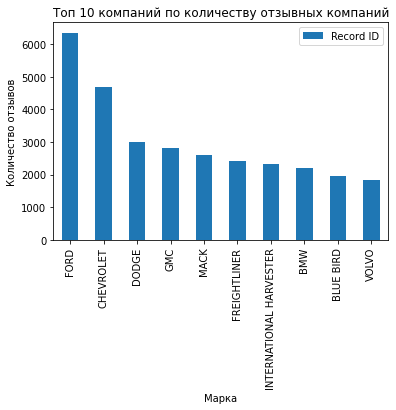

In [ ]:
df_make.iloc[:10].plot(kind='bar',title='Топ 10 компаний по количеству отзывных компаний',xlabel='Марка', ylabel='Количество отзывов')

Интересно, что в топ 5 входят американские производители автомобилей. Конечно, может данные представленные по Америке или можно сделать вывод, что Американские авто самые продаваемые в мире, или предположить, что у них больше всего технических проблем или строже потребительские правила. Вопрос как FORD зарабатывает, если столько отзывов

In [ ]:
df_comp = df[['Record ID','Recall Component']].groupby('Recall Component').count().sort_values('Record ID',ascending=False)
df_comp.head(10)

,Record ID
Recall Component,
EQUIPMENT:RECREATIONAL VEHICLE,6530
EQUIPMENT,6515
EQUIPMENT ADAPTIVE,4740
EQUIPMENT:OTHER:LABELS,3749
EXTERIOR LIGHTING,3746
SEATS,2149
ELECTRICAL SYSTEM,1967
VEHICLE SPEED CONTROL,1906
EXTERIOR LIGHTING:HEADLIGHTS,1789


In [ ]:
df_comp.iloc[:10].style.bar(align = 'mid')

,Record ID
Recall Component,
EQUIPMENT:RECREATIONAL VEHICLE,6530
EQUIPMENT,6515
EQUIPMENT ADAPTIVE,4740
EQUIPMENT:OTHER:LABELS,3749
EXTERIOR LIGHTING,3746
SEATS,2149
ELECTRICAL SYSTEM,1967
VEHICLE SPEED CONTROL,1906
EXTERIOR LIGHTING:HEADLIGHTS,1789


Основные причины отзывных компаний Топ - 3 формулировки максимально размыты и не дают конкретики. Что за оборудование? Рискну предположить, что под этими формулировками скрываются системы безопасности автомобилей, т.к. при выявлении такого рода проблем идут масштабные действия.

In [ ]:
df['Recall Type'].unique()

array(['VEHICLE', 'EQUIPMENT', 'TIRE', 'X', 'C', 'I'], dtype=object)

In [ ]:
df_recall_type = df[['Recall Type','Record ID', 'Model Year']]
df_recall_type.head()

,Recall Type,Record ID,Model Year
0,VEHICLE,1,2001
1,VEHICLE,2,2000
2,VEHICLE,3,2003
3,VEHICLE,4,2003
4,VEHICLE,5,2002


In [ ]:
df_type = df_recall_type.pivot_table(index = 'Model Year',columns='Recall Type', values='Record ID', fill_value=0)
df_type

Recall Type,C,EQUIPMENT,I,TIRE,VEHICLE,X
Model Year,,,,,,
1949,0.000000,0.000000,0.0,0.000000,54033.000000,0.0
1950,0.000000,0.000000,0.0,0.000000,54041.000000,0.0
1951,0.000000,0.000000,0.0,0.000000,54040.000000,0.0
1952,0.000000,0.000000,0.0,0.000000,54039.000000,0.0
1953,0.000000,0.000000,0.0,0.000000,54038.000000,0.0
...,...,...,...,...,...,...
2015,0.000000,110109.307692,0.0,0.000000,113752.417755,0.0
2016,0.000000,112120.384615,0.0,0.000000,116353.263556,0.0
2017,0.000000,109333.666667,0.0,0.000000,120356.141960,0.0


In [ ]:
df_type = df_type.drop([9999])
df_type

Recall Type,C,EQUIPMENT,I,TIRE,VEHICLE,X
Model Year,,,,,,
1949,0.0,0.000000,0.0,0.0,54033.000000,0.0
1950,0.0,0.000000,0.0,0.0,54041.000000,0.0
1951,0.0,0.000000,0.0,0.0,54040.000000,0.0
1952,0.0,0.000000,0.0,0.0,54039.000000,0.0
1953,0.0,0.000000,0.0,0.0,54038.000000,0.0
...,...,...,...,...,...,...
2014,0.0,105857.500000,0.0,0.0,109287.217330,0.0
2015,0.0,110109.307692,0.0,0.0,113752.417755,0.0
2016,0.0,112120.384615,0.0,0.0,116353.263556,0.0


In [ ]:
df_type = df_type[['EQUIPMENT','TIRE','VEHICLE']]
df_type

Recall Type,EQUIPMENT,TIRE,VEHICLE
Model Year,,,
1949,0.000000,0.0,54033.000000
1950,0.000000,0.0,54041.000000
1951,0.000000,0.0,54040.000000
1952,0.000000,0.0,54039.000000
1953,0.000000,0.0,54038.000000
...,...,...,...
2014,105857.500000,0.0,109287.217330
2015,110109.307692,0.0,113752.417755
2016,112120.384615,0.0,116353.263556


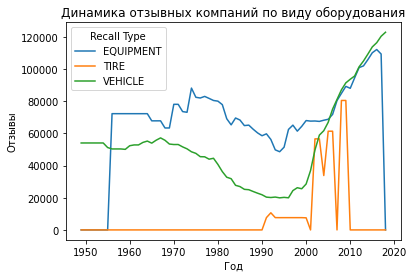

In [ ]:
df_type.plot(title='Динамика отзывных компаний по виду оборудования', 
                             xlabel='Год', 
                             ylabel='Отзывы')

Что-то не так со значениями из сводной таблицы

In [ ]:
# У каких марок шин было больше всего отзывных компаний
df_tire = df.loc[df['Recall Type'] == 'TIRE']
df_tire = df_tire[['Record ID','Vehicle Make']].groupby('Vehicle Make').count().sort_values('Record ID',ascending=False).rename(columns = {'Vehicle Make':'Tire Make','Record ID':'Recalls'})
df_tire.head()

,Recalls
Vehicle Make,
COOPER,283
FIRESTONE,119
HERCULES,109
ATLAS,69
B.F.GOODRICH,64


In [ ]:
import seaborn as sns

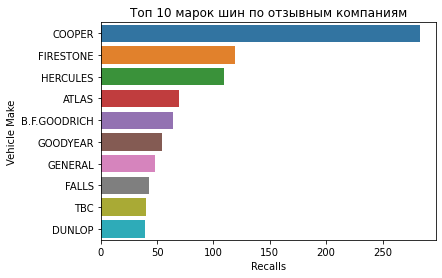

In [ ]:
df_tires_most = df_tire.iloc[:10]
sns.barplot(y=df_tires_most.index,x=df_tires_most['Recalls'])
plt.title('Топ 10 марок шин по отзывным компаниям')

plt.show()

Cooper значительно больше отзыов, чем у остальных и снова 
американский бренд. Можно предположить, что и продаж их больше остальных, погуглив именно это и получается. А также можно предположить о высоком стандарте качества и проверок безопасности, гарантийного обслуживания